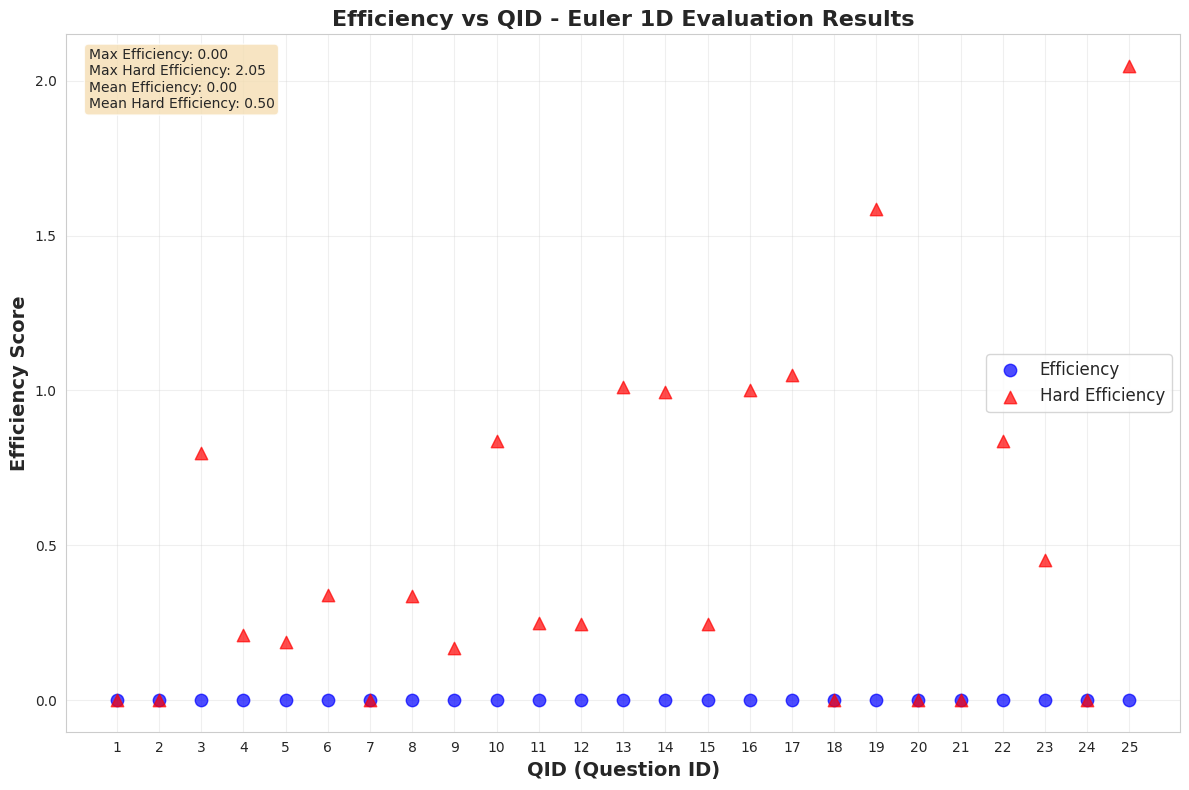

Total number of evaluations: 25
QID range: 1 to 25
Efficiency - Max: 0.000, Min: 0.000, Mean: 0.000
Hard Efficiency - Max: 2.048, Min: 0.000, Mean: 0.504
Success rate (non-zero Hard Efficiency): 72.0% (18/25)


In [1]:
import re
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

def parse_evaluation_log(file_path):
    """Parse evaluation log file to extract QID, Efficiency, and Hard Efficiency data"""
    data = {
        'QID': [],
        'Efficiency': [],
        'Hard Efficiency': []
    }
    
    with open(file_path, 'r') as f:
        content = f.read()
    
    # Find all evaluation result blocks
    result_blocks = re.findall(r'📊 --- Evaluation Result ---(.*?)------------------------------', content, re.DOTALL)
    
    for block in result_blocks:
        # Extract QID
        qid_match = re.search(r'🆔 QID: (\d+)', block)
        if qid_match:
            qid = int(qid_match.group(1))
            data['QID'].append(qid)
            
            # Extract Efficiency
            eff_match = re.search(r'⚡ Efficiency: ([\d.]+)', block)
            if eff_match:
                efficiency = float(eff_match.group(1))
                data['Efficiency'].append(efficiency)
            else:
                data['Efficiency'].append(0.0)
            
            # Extract Hard Efficiency
            hard_eff_match = re.search(r'⚡ Hard Efficiency: ([\d.]+)', block)
            if hard_eff_match:
                hard_efficiency = float(hard_eff_match.group(1))
                data['Hard Efficiency'].append(hard_efficiency)
            else:
                data['Hard Efficiency'].append(0.0)
    
    return data

# Parse the evaluation log file
log_file_path = '/home/ubuntu/dev/SimulCost-Bench/eval_results/euler_1d/n_space/medium/iterative_ab_openai_init_score.log'
data = parse_evaluation_log(log_file_path)

# Create the plot
plt.figure(figsize=(12, 8))

# Set seaborn style
sns.set_style("whitegrid")

# Create scatter plot with different colors for each metric
plt.scatter(data['QID'], data['Efficiency'], 
           label='Efficiency', alpha=0.7, s=80, marker='o', color='blue')
plt.scatter(data['QID'], data['Hard Efficiency'], 
           label='Hard Efficiency', alpha=0.7, s=80, marker='^', color='red')

# Customize the plot
plt.xlabel('QID (Question ID)', fontsize=14, fontweight='bold')
plt.ylabel('Efficiency Score', fontsize=14, fontweight='bold')
plt.title('Efficiency vs QID - Euler 1D Evaluation Results', fontsize=16, fontweight='bold')
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)

# Set x-axis to show all QIDs
plt.xticks(data['QID'])

# Add some statistics as text
max_eff = max(data['Efficiency'])
max_hard_eff = max(data['Hard Efficiency'])
mean_eff = np.mean(data['Efficiency'])
mean_hard_eff = np.mean(data['Hard Efficiency'])

plt.text(0.02, 0.98, f'Max Efficiency: {max_eff:.2f}\nMax Hard Efficiency: {max_hard_eff:.2f}\n'
                     f'Mean Efficiency: {mean_eff:.2f}\nMean Hard Efficiency: {mean_hard_eff:.2f}',
         transform=plt.gca().transAxes, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.tight_layout()
plt.show()

# Print summary statistics
print(f"Total number of evaluations: {len(data['QID'])}")
print(f"QID range: {min(data['QID'])} to {max(data['QID'])}")
print(f"Efficiency - Max: {max_eff:.3f}, Min: {min(data['Efficiency']):.3f}, Mean: {mean_eff:.3f}")
print(f"Hard Efficiency - Max: {max_hard_eff:.3f}, Min: {min(data['Hard Efficiency']):.3f}, Mean: {mean_hard_eff:.3f}")

# Count non-zero hard efficiency (successful cases)
non_zero_hard_eff = sum(1 for x in data['Hard Efficiency'] if x > 0)
success_rate = non_zero_hard_eff / len(data['Hard Efficiency'])
print(f"Success rate (non-zero Hard Efficiency): {success_rate:.1%} ({non_zero_hard_eff}/{len(data['Hard Efficiency'])})")

Total models: 17
Models with non-zero performance: 16


/tmp/ipykernel_3283017/2245900143.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['method'] = df_filtered['model_name'].apply(get_method)
/tmp/ipykernel_3283017/2245900143.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['clean_label'] = df_filtered['model_name'].apply(get_clean_label)
/tmp/ipykernel_3283017/2245900143.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

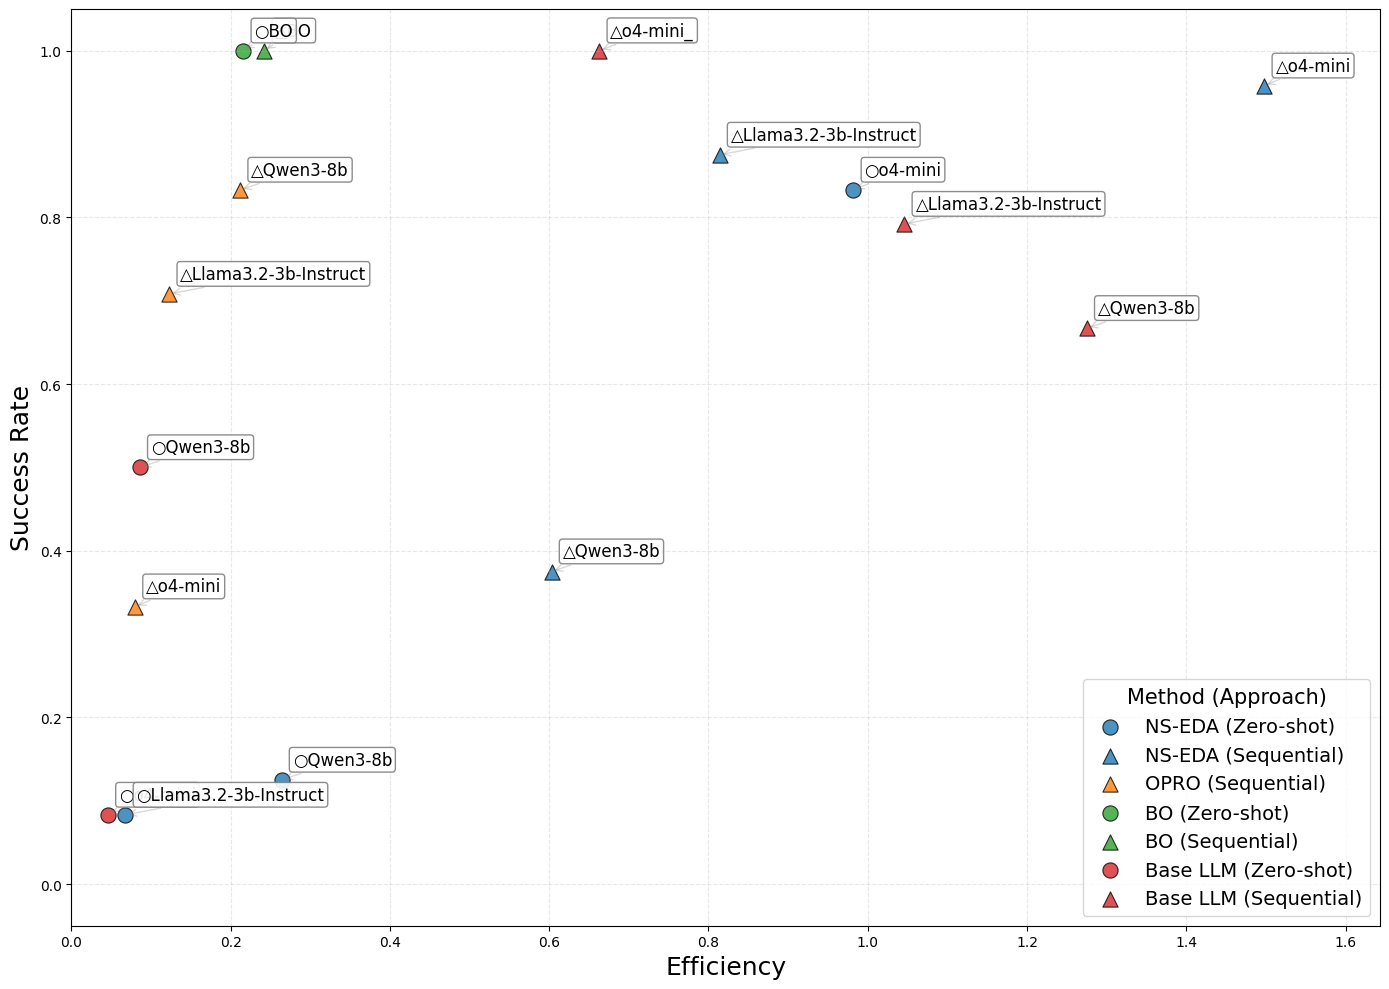


Summary Statistics by Method and Approach:

NS-EDA:
  Zero-shot (3 models):
    Hard Efficiency - Mean: 0.438, Std: 0.481
    Success Rate - Mean: 0.347, Std: 0.421
  Sequential (3 models):
    Hard Efficiency - Mean: 0.972, Std: 0.468
    Success Rate - Mean: 0.736, Std: 0.315

OPRO:
  Sequential (3 models):
    Hard Efficiency - Mean: 0.138, Std: 0.067
    Success Rate - Mean: 0.625, Std: 0.260

BO:
  Zero-shot (1 models):
    Hard Efficiency - Mean: 0.216, Std: nan
    Success Rate - Mean: 1.000, Std: nan
  Sequential (1 models):
    Hard Efficiency - Mean: 0.242, Std: nan
    Success Rate - Mean: 1.000, Std: nan

Base LLM:
  Zero-shot (2 models):
    Hard Efficiency - Mean: 0.066, Std: 0.028
    Success Rate - Mean: 0.291, Std: 0.295
  Sequential (3 models):
    Hard Efficiency - Mean: 0.995, Std: 0.309
    Success Rate - Mean: 0.820, Std: 0.168

All models by approach and method:
         clean_label   method approach_type  success_rate  hard_efficiency
                  BO      

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import json
import numpy as np

# Load the parsed evaluation results
with open('/home/ubuntu/dev/temp/evaluation_results.json', 'r') as f:
    evaluation_data = json.load(f)

# Convert to DataFrame
df = pd.DataFrame(evaluation_data)

# Filter out models with zero performance (likely failed runs)
df_filtered = df[(df['success_rate'] > 0) | (df['hard_efficiency'] > 0)]

print(f"Total models: {len(df)}")
print(f"Models with non-zero performance: {len(df_filtered)}")

# Function to determine method from model name
def get_method(model_name):
    # Remove zero_shot_ or iterative_ prefix to get the core name
    core_name = model_name.replace('zero_shot_', '').replace('iterative_', '')
    
    if 'OPRO' in core_name:
        return 'OPRO'
    elif 'BO' in core_name:
        return 'BO'
    elif 'NS-EDA' in core_name:
        return 'NS-EDA'
    else:
        # Base LLMs: models without NS-EDA, OPRO, or BO
        return 'Base LLM'

def get_clean_label(model_name):
    # Remove prefixes and method prefixes to get only model name
    clean_name = model_name.replace('zero_shot_', '').replace('iterative_', '')
    
    # Remove method prefixes
    method_prefixes = ['OPRO_', 'NS-EDA_', 'BO_']
    for prefix in method_prefixes:
        if clean_name.startswith(prefix):
            clean_name = clean_name[len(prefix):]
            break
    
    return clean_name

def get_approach_type(model_name):
    if model_name.startswith('zero_shot_'):
        return 'Zero-shot'
    elif model_name.startswith('iterative_'):
        return 'Sequential'
    else:
        return 'Unknown'

# Add method, clean label, and approach type columns
df_filtered['method'] = df_filtered['model_name'].apply(get_method)
df_filtered['clean_label'] = df_filtered['model_name'].apply(get_clean_label)
df_filtered['approach_type'] = df_filtered['model_name'].apply(get_approach_type)

# Define method colors
method_colors = {
    'NS-EDA': '#1f77b4',    # Blue
    'OPRO': '#ff7f0e',      # Orange  
    'BO': '#2ca02c',        # Green
    'Base LLM': '#d62728'   # Red
}

# Define markers for approach types
approach_markers = {
    'Zero-shot': 'o',  # Circle
    'Sequential': '^'   # Triangle
}

# Set up the plot style
plt.style.use('default')

# Create the scatter plot
fig, ax = plt.subplots(figsize=(14, 10))

# Create scatter plot with method-based colors and approach-based markers
for method in method_colors.keys():
    for approach in approach_markers.keys():
        method_approach_data = df_filtered[(df_filtered['method'] == method) & 
                                         (df_filtered['approach_type'] == approach)]
        if len(method_approach_data) > 0:
            ax.scatter(method_approach_data['hard_efficiency'], 
                      method_approach_data['success_rate'],
                      c=method_colors[method],
                      marker=approach_markers[approach],
                      s=120,
                      alpha=0.8,
                      label=f'{method} ({approach})',
                      edgecolors='black',
                      linewidth=0.8)

# Add labels for each point
for idx, row in df_filtered.iterrows():
    # Use smaller font and adjust positioning to avoid overlap
    approach_symbol = '○' if row['approach_type'] == 'Zero-shot' else '△'
    label_text = f"{approach_symbol}{row['clean_label']}"
    
    ax.annotate(label_text, 
               (row['hard_efficiency'], row['success_rate']),
               xytext=(8, 8), textcoords='offset points',
               fontsize=12, ha='left', va='bottom',
               bbox=dict(boxstyle='round,pad=0.2', facecolor='white', alpha=0.9, edgecolor='gray'),
               arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0', color='gray', alpha=0.3))

# Customize the plot
ax.set_xlabel('Efficiency', fontsize=18)
ax.set_ylabel('Success Rate', fontsize=18)
#ax.set_title('Performence on 1D Heat Conduction Simulation Experimental Design', fontsize=16, pad=20)

# Add grid for better readability
ax.grid(True, alpha=0.3, linestyle='--')

# Set axis limits with some padding
x_margin = (df_filtered['hard_efficiency'].max() - df_filtered['hard_efficiency'].min()) * 0.1
y_margin = (df_filtered['success_rate'].max() - df_filtered['success_rate'].min()) * 0.1

ax.set_xlim(max(0, df_filtered['hard_efficiency'].min() - x_margin), 
           df_filtered['hard_efficiency'].max() + x_margin)
ax.set_ylim(-0.05, 1.05)  # Success rate is between 0 and 1

# Add legend - organize by method and approach, positioned at lower right
handles, labels = ax.get_legend_handles_labels()
# Sort legend entries by method first, then approach
legend_order = []
for method in ['NS-EDA', 'OPRO', 'BO', 'Base LLM']:
    for approach in ['Zero-shot', 'Sequential']:
        label_to_find = f'{method} ({approach})'
        if label_to_find in labels:
            idx = labels.index(label_to_find)
            legend_order.append((handles[idx], labels[idx]))

if legend_order:
    sorted_handles, sorted_labels = zip(*legend_order)
    ax.legend(sorted_handles, sorted_labels, loc='lower right', title='Method (Approach)', 
             fontsize=14, title_fontsize=15)

plt.tight_layout()

# Save the plot
output_file = '/home/ubuntu/dev/src/figures/scatter.pdf'
plt.savefig(output_file, dpi=300, bbox_inches='tight', format="pdf")
plt.show()

# Print summary statistics by method and approach
print(f"\nSummary Statistics by Method and Approach:")
for method in method_colors.keys():
    method_data = df_filtered[df_filtered['method'] == method]
    if len(method_data) > 0:
        print(f"\n{method}:")
        for approach in approach_markers.keys():
            approach_data = method_data[method_data['approach_type'] == approach]
            if len(approach_data) > 0:
                print(f"  {approach} ({len(approach_data)} models):")
                print(f"    Hard Efficiency - Mean: {approach_data['hard_efficiency'].mean():.3f}, Std: {approach_data['hard_efficiency'].std():.3f}")
                print(f"    Success Rate - Mean: {approach_data['success_rate'].mean():.3f}, Std: {approach_data['success_rate'].std():.3f}")

# Show all models organized by approach and method
print(f"\nAll models by approach and method:")
display_cols = ['clean_label', 'method', 'approach_type', 'success_rate', 'hard_efficiency']
df_display = df_filtered[display_cols].sort_values(['approach_type', 'method', 'hard_efficiency'], ascending=[True, True, False])
print(df_display.to_string(index=False))

# Show top performers overall
print(f"\nTop 5 performers by hard efficiency:")
top_performers = df_filtered.nlargest(5, 'hard_efficiency')[['clean_label', 'method', 'approach_type', 'success_rate', 'hard_efficiency']]
print(top_performers.to_string(index=False))

# Show Base LLM models specifically
base_llm_models = df_filtered[df_filtered['method'] == 'Base LLM']
print(f"\nBase LLM models ({len(base_llm_models)} total):")
if len(base_llm_models) > 0:
    base_display = base_llm_models[['clean_label', 'approach_type', 'success_rate', 'hard_efficiency']].sort_values('hard_efficiency', ascending=False)
    print(base_display.to_string(index=False))
else:
    print("  No Base LLM models found. Check classification logic.")

In [17]:
#!/usr/bin/env python3
import torch
import matplotlib.pyplot as plt
import numpy as np
import json
import os
from pathlib import Path

In [18]:
def load_euler_data(data_path, metadata_path):
    """Load Euler 1D CFL training data and metadata"""
    with open(metadata_path, 'r') as f:
        metadata = json.load(f)
    
    data = torch.load(data_path)
    print(f"Loaded {len(data)} samples from {data_path}")
    
    # Verify data structure: each sample should be a tuple of 3 tensors
    if len(data) > 0:
        sample = data[0]
        print(f"Sample structure: {type(sample)}")
        if isinstance(sample, tuple) and len(sample) == 3:
            print(f"  Item 0 (x_s): shape {sample[0].shape}, dtype {sample[0].dtype}")
            print(f"  Item 1 (x_t): shape {sample[1].shape}, dtype {sample[1].dtype}")  
            print(f"  Item 2 (y): shape {sample[2].shape}, dtype {sample[2].dtype}")
        
    return data, metadata

def process_euler_data(data):
    """Convert list of tuples to stacked tensors for Euler 1D data
    
    Each sample in data is a tuple of (x_s_tensor[4], x_t_tensor[4], y_tensor[2])
    """
    x_s_list = [sample[0] for sample in data]  # 4-dimensional tensors
    x_t_list = [sample[1] for sample in data]  # 4-dimensional tensors
    y_list = [sample[2] for sample in data]    # 2-dimensional tensors
    
    x_s = torch.stack(x_s_list)  # Shape: [n_samples, 4]
    x_t = torch.stack(x_t_list)  # Shape: [n_samples, 4] 
    y = torch.stack(y_list)      # Shape: [n_samples, 2]
    
    return x_s, x_t, y

In [19]:
def visualize_euler_train_test_distributions(train_data, test_data, metadata, save_dir="./temp"):
    """Visualize Euler 1D CFL data distributions comparing train and test sets
    
    Expected data format: list of tuples (x_s[4], x_t[4], y[2])
    """
    
    # Process both datasets
    train_x_s, train_x_t, train_y = process_euler_data(train_data)
    test_x_s, test_x_t, test_y = process_euler_data(test_data)
    
    print(f"Train data shapes:")
    print(f"  x_s: {train_x_s.shape}, x_t: {train_x_t.shape}, y: {train_y.shape}")
    print(f"Test data shapes:")
    print(f"  x_s: {test_x_s.shape}, x_t: {test_x_t.shape}, y: {test_y.shape}")
    
    # Create output directory
    os.makedirs(save_dir, exist_ok=True)
    
    # Visualize x_s dimensions (4 dimensions: cfl, beta, k, n_space parameters)
    x_s_labels = ['CFL', 'Beta', 'K', 'N_space']
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    axes = axes.flatten()
    
    for i in range(4):
        ax = axes[i]
        
        # Plot both train and test
        ax.hist(train_x_s[:, i].numpy(), bins=50, alpha=0.6, label='Train', 
               color='blue', edgecolor='black', density=True)
        ax.hist(test_x_s[:, i].numpy(), bins=50, alpha=0.6, label='Test', 
               color='red', edgecolor='black', density=True)
        
        ax.set_title(f'x_s[{i}]: {x_s_labels[i]} Parameter', fontsize=14, fontweight='bold')
        ax.set_xlabel('Parameter Value')
        ax.set_ylabel('Density')
        ax.legend()
        ax.grid(True, alpha=0.3)
    
    plt.suptitle('Euler 1D CFL - Parameter Distributions: Train vs Test', fontsize=16)
    plt.tight_layout()
    plt.savefig(f"{save_dir}/euler_x_s_train_test_distributions.png", dpi=300, bbox_inches='tight')
    plt.show()
    
    # Visualize x_t dimensions (4 dimensions: target conditions/physics)
    x_t_labels = ['Target_0', 'Target_1', 'Target_2', 'Target_3'] 
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    axes = axes.flatten()
    
    for i in range(4):
        ax = axes[i]
        
        ax.hist(train_x_t[:, i].numpy(), bins=50, alpha=0.6, label='Train', 
               color='blue', edgecolor='black', density=True)
        ax.hist(test_x_t[:, i].numpy(), bins=50, alpha=0.6, label='Test', 
               color='red', edgecolor='black', density=True)
        
        ax.set_title(f'x_t[{i}]: {x_t_labels[i]}', fontsize=14, fontweight='bold')
        ax.set_xlabel('Value')
        ax.set_ylabel('Density')
        ax.legend()
        ax.grid(True, alpha=0.3)
    
    plt.suptitle('Euler 1D CFL - Target Conditions: Train vs Test', fontsize=16)
    plt.tight_layout()
    plt.savefig(f"{save_dir}/euler_x_t_train_test_distributions.png", dpi=300, bbox_inches='tight')
    plt.show()
    
    # Visualize y dimensions (2 dimensions: RMSE and convergence metrics)
    y_labels = ['RMSE', 'Convergence_Score']
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    
    for i in range(2):
        ax = axes[i]
        
        ax.hist(train_y[:, i].numpy(), bins=50, alpha=0.6, label='Train', 
               color='blue', edgecolor='black', density=True)
        ax.hist(test_y[:, i].numpy(), bins=50, alpha=0.6, label='Test', 
               color='red', edgecolor='black', density=True)
        
        ax.set_title(f'y[{i}]: {y_labels[i]}', fontsize=14, fontweight='bold')
        ax.set_xlabel('Value')
        ax.set_ylabel('Density')
        ax.legend()
        ax.grid(True, alpha=0.3)
        
        # Use log scale for RMSE if values are very small
        if i == 0:  # RMSE dimension
            min_val = min(train_y[:, i].min().item(), test_y[:, i].min().item())
            if min_val > 0 and min_val < 0.01:
                ax.set_xscale('log')
    
    plt.suptitle('Euler 1D CFL - Output Metrics: Train vs Test', fontsize=16)
    plt.tight_layout()
    plt.savefig(f"{save_dir}/euler_y_train_test_distributions.png", dpi=300, bbox_inches='tight')
    plt.show()
    
    # Print comparative statistics
    print("\n" + "="*80)
    print("EULER 1D CFL - COMPARATIVE STATISTICS: TRAIN vs TEST")
    print("="*80)
    
    print("\nParameter Statistics (x_s):")
    for i, label in enumerate(x_s_labels):
        train_dim = train_x_s[:, i]
        test_dim = test_x_s[:, i]
        print(f"  {label}:")
        print(f"    Train: mean={train_dim.mean():.4f}, std={train_dim.std():.4f}, "
              f"min={train_dim.min():.4f}, max={train_dim.max():.4f}")
        print(f"    Test:  mean={test_dim.mean():.4f}, std={test_dim.std():.4f}, "
              f"min={test_dim.min():.4f}, max={test_dim.max():.4f}")
        
        # Check for distribution shift
        mean_diff = abs(train_dim.mean() - test_dim.mean())
        std_diff = abs(train_dim.std() - test_dim.std())
        print(f"    Diff:  mean_diff={mean_diff:.4f}, std_diff={std_diff:.4f}")
        
        if mean_diff > 0.1 * train_dim.std() or std_diff > 0.1 * train_dim.std():
            print(f"    ⚠️  WARNING: Potential distribution shift detected!")
        print()
    
    print("Target Conditions Statistics (x_t):")
    for i, label in enumerate(x_t_labels):
        train_dim = train_x_t[:, i]
        test_dim = test_x_t[:, i]
        print(f"  {label}:")
        print(f"    Train: mean={train_dim.mean():.4f}, std={train_dim.std():.4f}, "
              f"min={train_dim.min():.4f}, max={train_dim.max():.4f}")
        print(f"    Test:  mean={test_dim.mean():.4f}, std={test_dim.std():.4f}, "
              f"min={test_dim.min():.4f}, max={test_dim.max():.4f}")
        
        mean_diff = abs(train_dim.mean() - test_dim.mean())
        std_diff = abs(train_dim.std() - test_dim.std())
        print(f"    Diff:  mean_diff={mean_diff:.4f}, std_diff={std_diff:.4f}")
        
        if mean_diff > 0.1 * train_dim.std() or std_diff > 0.1 * train_dim.std():
            print(f"    ⚠️  WARNING: Potential distribution shift detected!")
        print()
    
    print("Output Metrics Statistics (y):")
    for i, label in enumerate(y_labels):
        train_dim = train_y[:, i]
        test_dim = test_y[:, i]
        print(f"  {label}:")
        print(f"    Train: mean={train_dim.mean():.4f}, std={train_dim.std():.4f}, "
              f"min={train_dim.min():.4f}, max={train_dim.max():.4f}")
        print(f"    Test:  mean={test_dim.mean():.4f}, std={test_dim.std():.4f}, "
              f"min={test_dim.min():.4f}, max={test_dim.max():.4f}")
        
        mean_diff = abs(train_dim.mean() - test_dim.mean())
        std_diff = abs(train_dim.std() - test_dim.std())
        print(f"    Diff:  mean_diff={mean_diff:.4f}, std_diff={std_diff:.4f}")
        
        if mean_diff > 0.1 * train_dim.std() or std_diff > 0.1 * train_dim.std():
            print(f"    ⚠️  WARNING: Potential distribution shift detected!")
        print()

def create_euler_correlation_matrix(data, save_dir="./temp"):
    """Create correlation matrix for Euler 1D CFL data"""
    x_s, x_t, y = process_euler_data(data)
    
    # Combine all features
    all_features = torch.cat([x_s, x_t, y], dim=1)
    feature_names = ['CFL', 'Beta', 'K', 'N_space', 'Target_0', 'Target_1', 'Target_2', 'Target_3', 'RMSE', 'Conv_Score']
    
    # Calculate correlation matrix
    correlation_matrix = np.corrcoef(all_features.numpy().T)
    
    # Plot correlation matrix
    plt.figure(figsize=(12, 10))
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
    
    # Create heatmap
    import seaborn as sns
    sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', 
                center=0, square=True, xticklabels=feature_names, yticklabels=feature_names,
                cbar_kws={"shrink": .5})
    
    plt.title('Euler 1D CFL - Feature Correlation Matrix', fontsize=16)
    plt.tight_layout()
    plt.savefig(f"{save_dir}/euler_correlation_matrix.png", dpi=300, bbox_inches='tight')
    plt.show()
    
    return correlation_matrix, feature_names

Loading Euler 1D CFL training data...


Loaded 2182 samples from /home/ubuntu/dev/data/numerical/euler_1d_n_space/medium/train/euler_1d_n_space_samples.pt
Sample structure: <class 'tuple'>
  Item 0 (x_s): shape torch.Size([4]), dtype torch.float32
  Item 1 (x_t): shape torch.Size([4]), dtype torch.float32
  Item 2 (y): shape torch.Size([2]), dtype torch.float32
Loading Euler 1D CFL test data...
Loaded 243 samples from /home/ubuntu/dev/data/numerical/euler_1d_n_space/medium/test/euler_1d_n_space_samples.pt
Sample structure: <class 'tuple'>
  Item 0 (x_s): shape torch.Size([4]), dtype torch.float32
  Item 1 (x_t): shape torch.Size([4]), dtype torch.float32
  Item 2 (y): shape torch.Size([2]), dtype torch.float32

Metadata:
Problem: euler_1d
Tasks: ['cfl']
Sample shape: {'x_s_dim': 4, 'x_t_dim': 4, 'y_dim': 2}

Generating Euler 1D CFL comparative distribution plots...
Train data shapes:
  x_s: torch.Size([2182, 4]), x_t: torch.Size([2182, 4]), y: torch.Size([2182, 2])
Test data shapes:
  x_s: torch.Size([243, 4]), x_t: torch.Si

/tmp/ipykernel_3283017/2759399784.py:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(data_path)


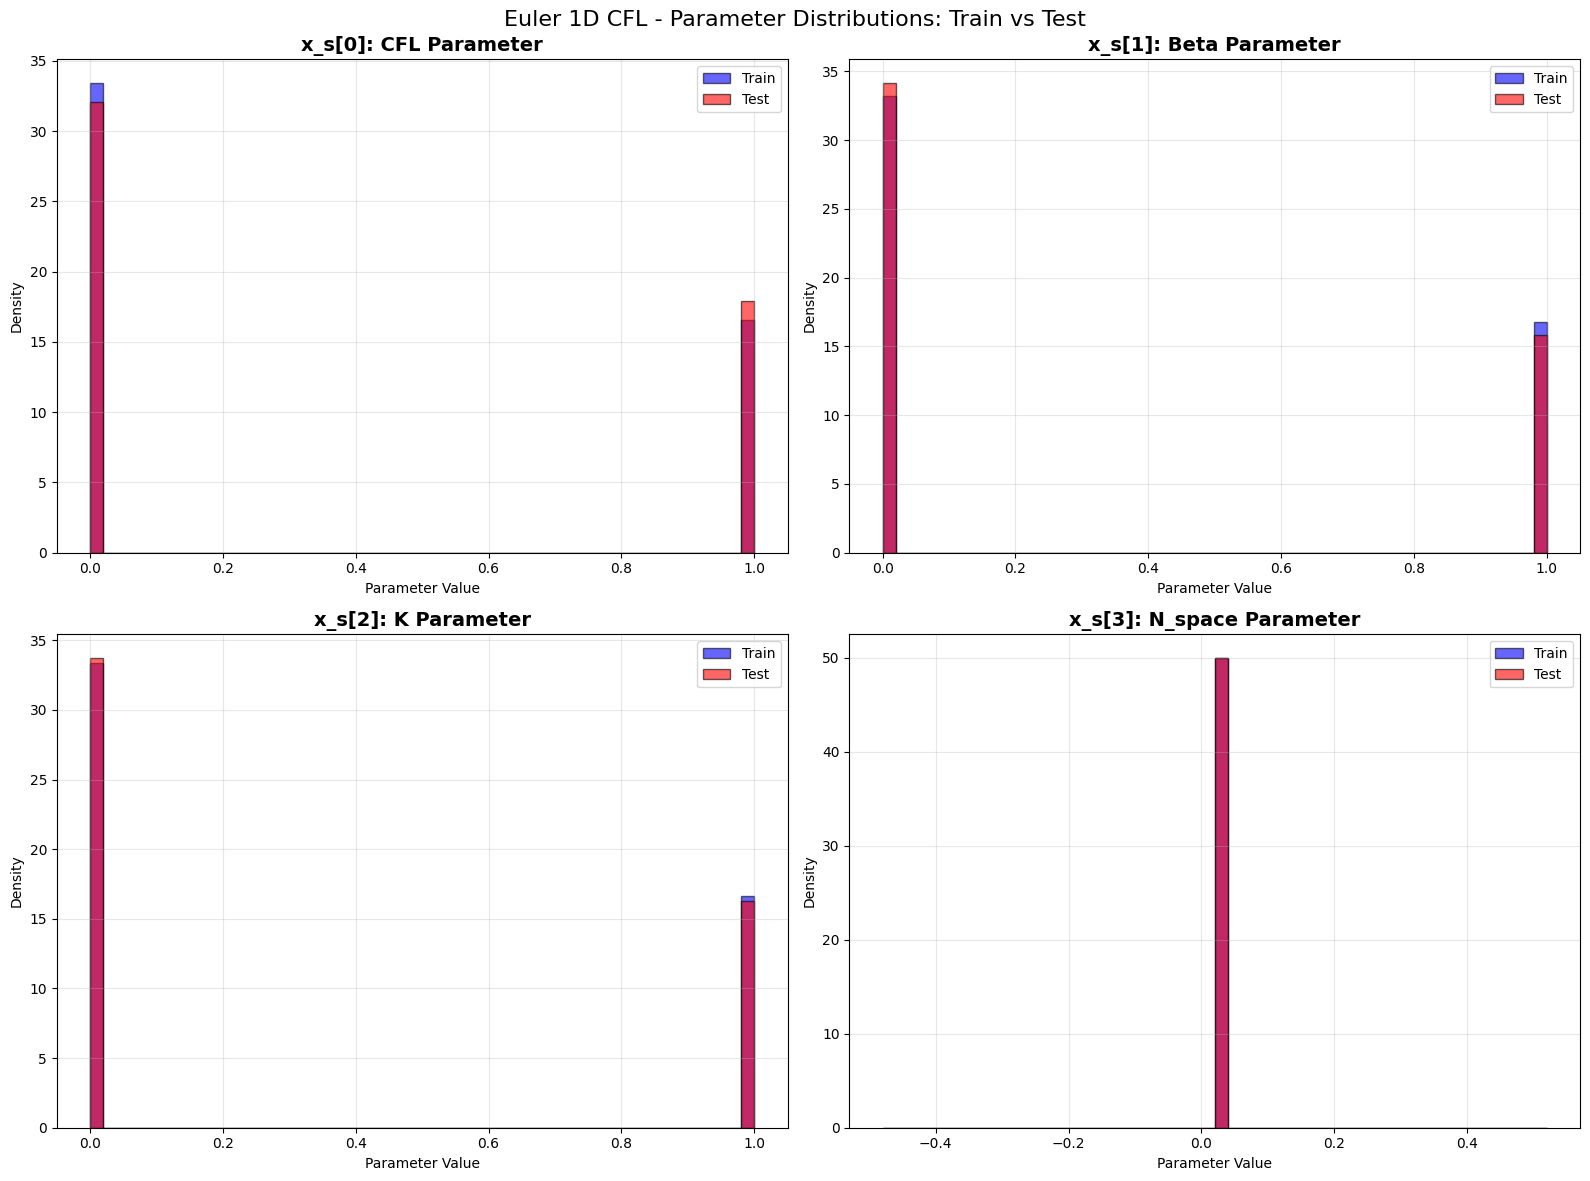

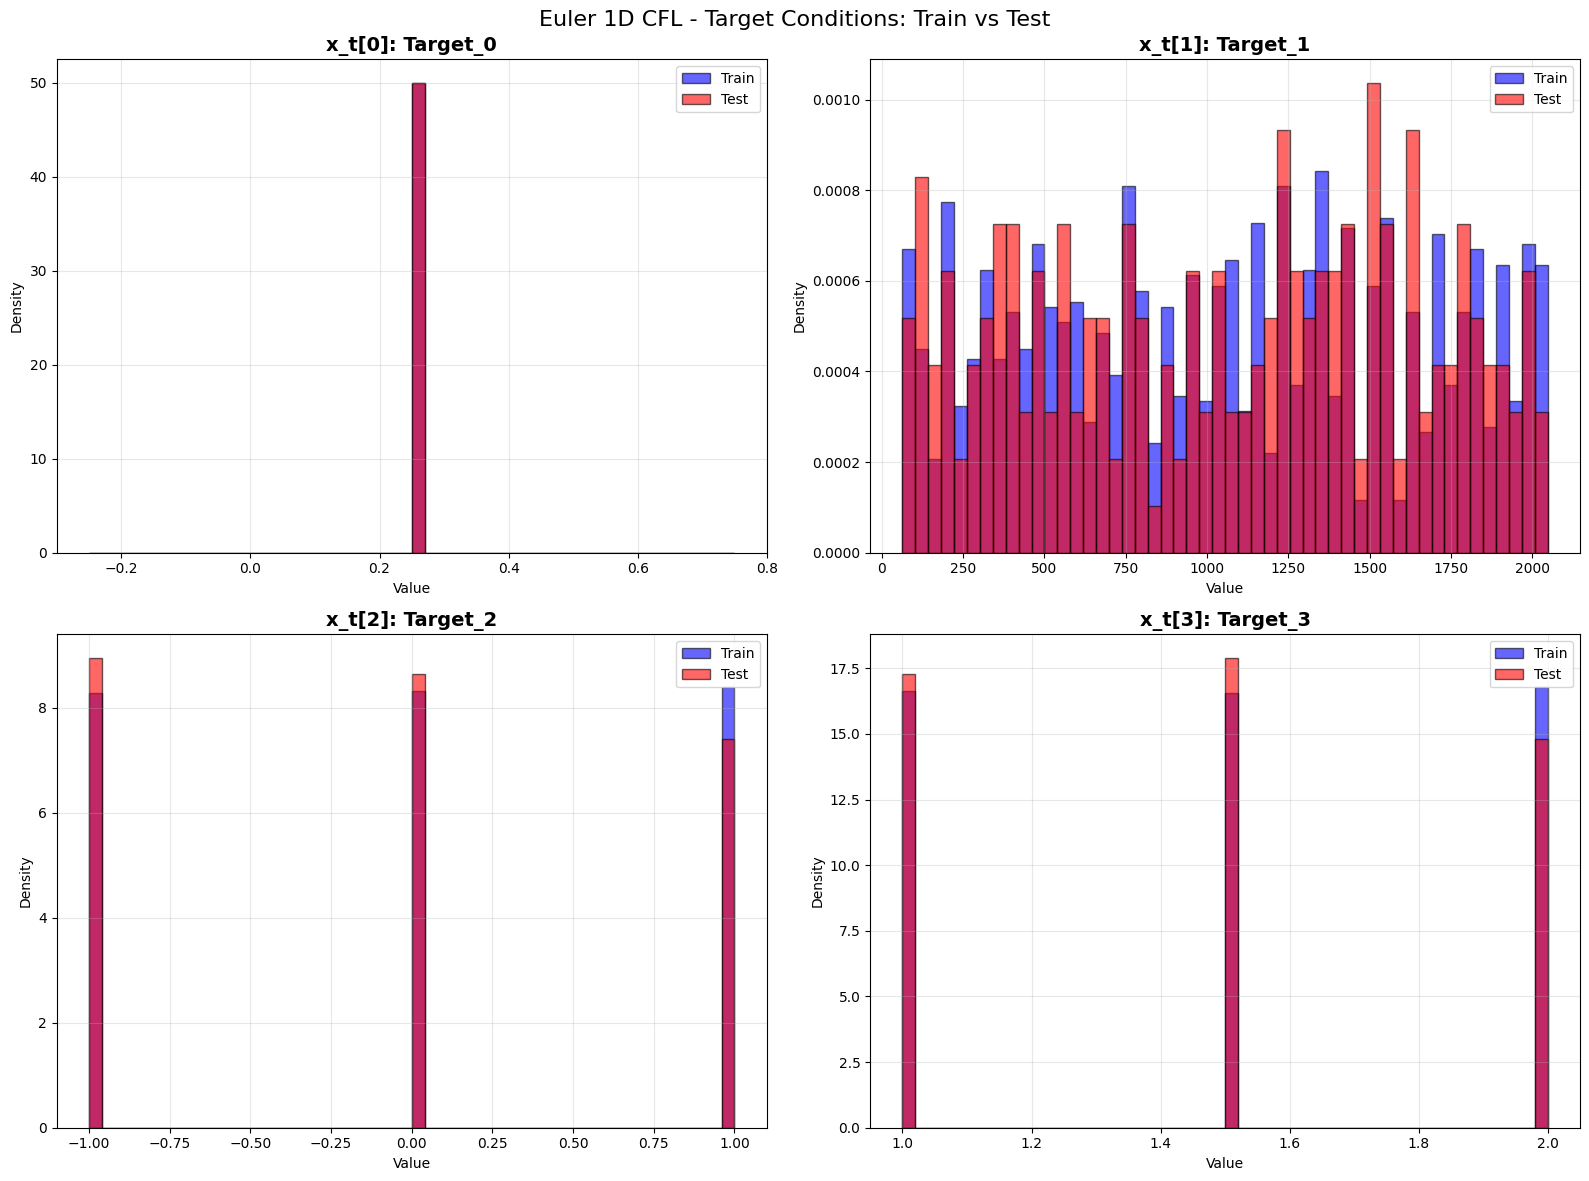

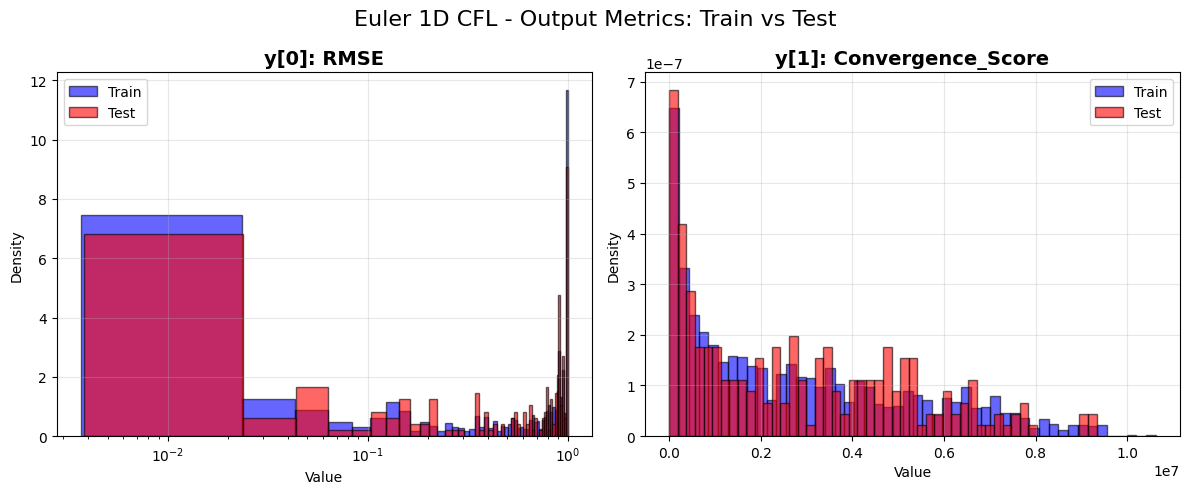


EULER 1D CFL - COMPARATIVE STATISTICS: TRAIN vs TEST

Parameter Statistics (x_s):
  CFL:
    Train: mean=0.3313, std=0.4708, min=0.0000, max=1.0000
    Test:  mean=0.3580, std=0.4804, min=0.0000, max=1.0000
    Diff:  mean_diff=0.0267, std_diff=0.0096

  Beta:
    Train: mean=0.3359, std=0.4724, min=0.0000, max=1.0000
    Test:  mean=0.3169, std=0.4662, min=0.0000, max=1.0000
    Diff:  mean_diff=0.0191, std_diff=0.0062

  K:
    Train: mean=0.3327, std=0.4713, min=0.0000, max=1.0000
    Test:  mean=0.3251, std=0.4694, min=0.0000, max=1.0000
    Diff:  mean_diff=0.0076, std_diff=0.0019

  N_space:
    Train: mean=0.0200, std=0.0000, min=0.0200, max=0.0200
    Test:  mean=0.0200, std=0.0000, min=0.0200, max=0.0200
    Diff:  mean_diff=0.0000, std_diff=0.0000
    ⚠️  WARNING: Potential distribution shift detected!

Target Conditions Statistics (x_t):
  Target_0:
    Train: mean=0.2500, std=0.0000, min=0.2500, max=0.2500
    Test:  mean=0.2500, std=0.0000, min=0.2500, max=0.2500
    Diff

/home/ubuntu/miniconda3/envs/simubench/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/ubuntu/miniconda3/envs/simubench/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


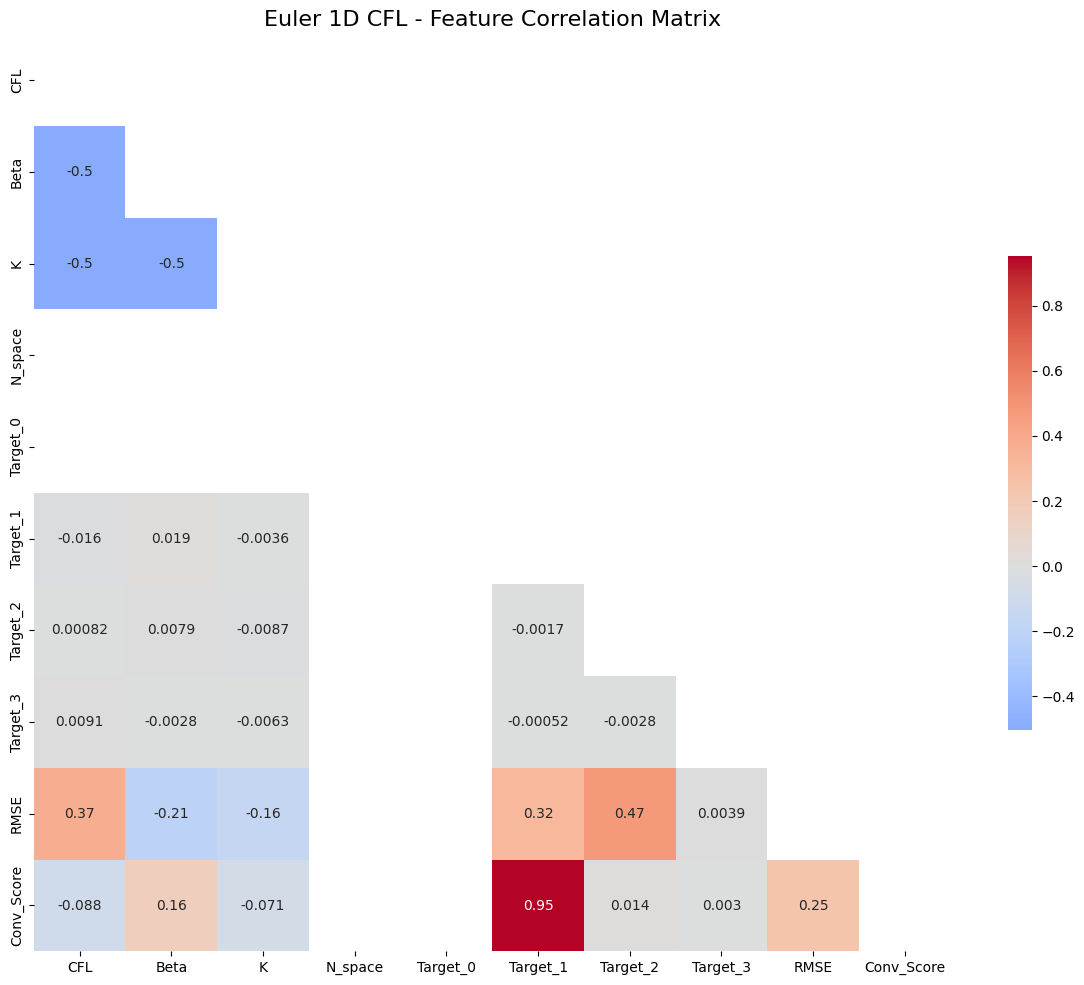

Euler 1D CFL visualization complete! Plots saved in /home/ubuntu/dev/outputs/figs/

Sample data verification:
First training sample:
  x_s (parameters): [0.   0.   1.   0.02]
  x_t (targets): [ 2.50e-01  9.73e+02 -1.00e+00  1.00e+00]
  y (outputs): [3.7932317e-03 1.6249100e+06]

Training set size: 2182
Test set size: 243

Parameter Analysis:
CFL: range [0.0000, 1.0000], unique values: 2
Beta: range [0.0000, 1.0000], unique values: 2
K: range [0.0000, 1.0000], unique values: 2
N_space: range [0.0200, 0.0200], unique values: 1


In [20]:
# Paths for Euler 1D CFL data
train_data_path = "/home/ubuntu/dev/data/numerical/euler_1d_n_space/medium/train/euler_1d_n_space_samples.pt"
train_metadata_path = "/home/ubuntu/dev/data/numerical/euler_1d_cfl/medium/train/euler_1d_cfl_samples_metadata.json"
test_data_path = "/home/ubuntu/dev/data/numerical/euler_1d_n_space/medium/test/euler_1d_n_space_samples.pt"
test_metadata_path = "/home/ubuntu/dev/data/numerical/euler_1d_cfl/medium/test/euler_1d_cfl_samples_metadata.json"

# Load Euler 1D CFL data
print("Loading Euler 1D CFL training data...")
train_data, train_metadata = load_euler_data(train_data_path, train_metadata_path)

print("Loading Euler 1D CFL test data...")
test_data, test_metadata = load_euler_data(test_data_path, test_metadata_path)

print("\nMetadata:")
print(f"Problem: {train_metadata.get('problem', 'Unknown')}")
print(f"Tasks: {train_metadata.get('tasks', 'Unknown')}")
print(f"Sample shape: {train_metadata.get('sample_shape', 'Unknown')}")

# Visualize Euler 1D CFL distributions
print("\nGenerating Euler 1D CFL comparative distribution plots...")
visualize_euler_train_test_distributions(train_data, test_data, train_metadata, save_dir="/home/ubuntu/dev/outputs/figs")

# Create correlation matrix
print("\nGenerating correlation matrix...")
correlation_matrix, feature_names = create_euler_correlation_matrix(train_data, save_dir="/home/ubuntu/dev/outputs/figs")

print("Euler 1D CFL visualization complete! Plots saved in /home/ubuntu/dev/outputs/figs/")

# Print sample data for verification
print("\nSample data verification:")
print(f"First training sample:")
if len(train_data) > 0:
    sample = train_data[0]
    print(f"  x_s (parameters): {sample[0].numpy()}")
    print(f"  x_t (targets): {sample[1].numpy()}")
    print(f"  y (outputs): {sample[2].numpy()}")
    
print(f"\nTraining set size: {len(train_data)}")
print(f"Test set size: {len(test_data)}")

# Additional analysis: parameter ranges
print("\nParameter Analysis:")
train_x_s, train_x_t, train_y = process_euler_data(train_data)
x_s_labels = ['CFL', 'Beta', 'K', 'N_space']
for i, label in enumerate(x_s_labels):
    param_values = train_x_s[:, i]
    print(f"{label}: range [{param_values.min():.4f}, {param_values.max():.4f}], unique values: {len(param_values.unique())}")

Creating parameter relationship plots...


/home/ubuntu/miniconda3/envs/simubench/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/ubuntu/miniconda3/envs/simubench/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


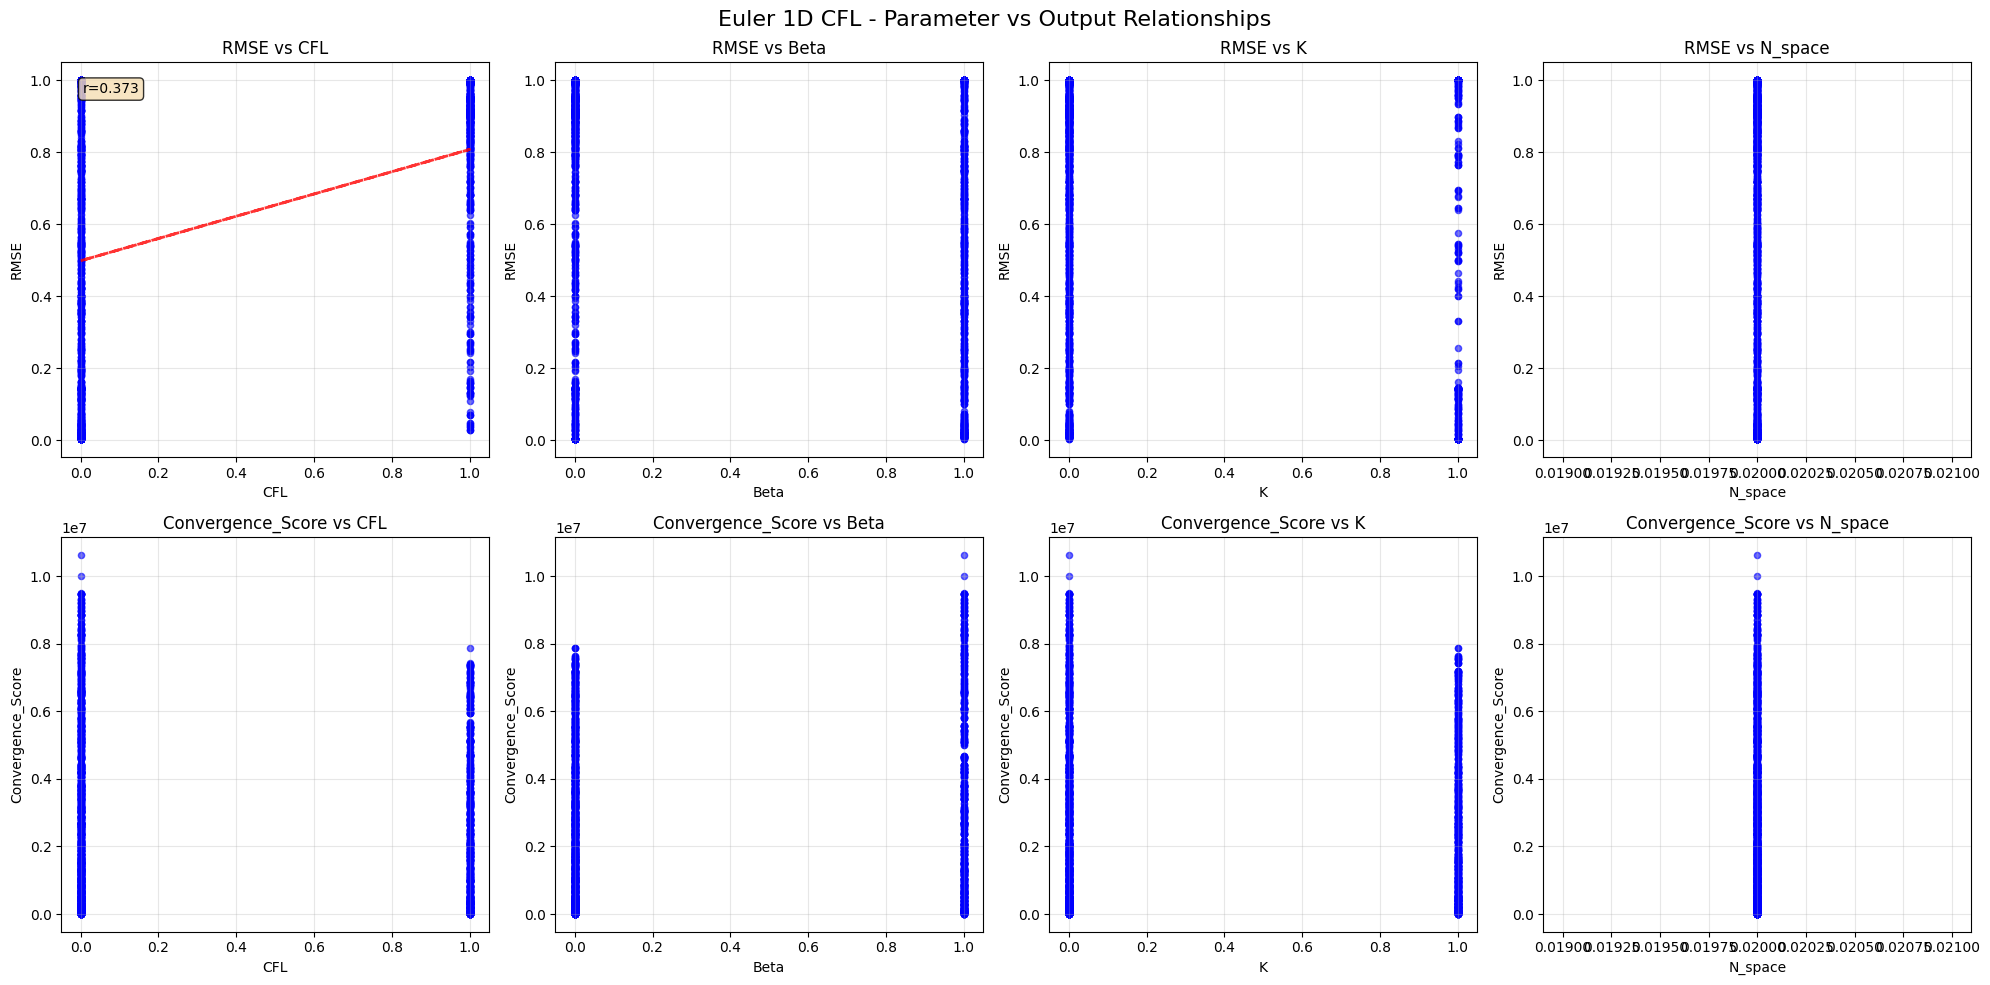

Creating parameter space visualizations...


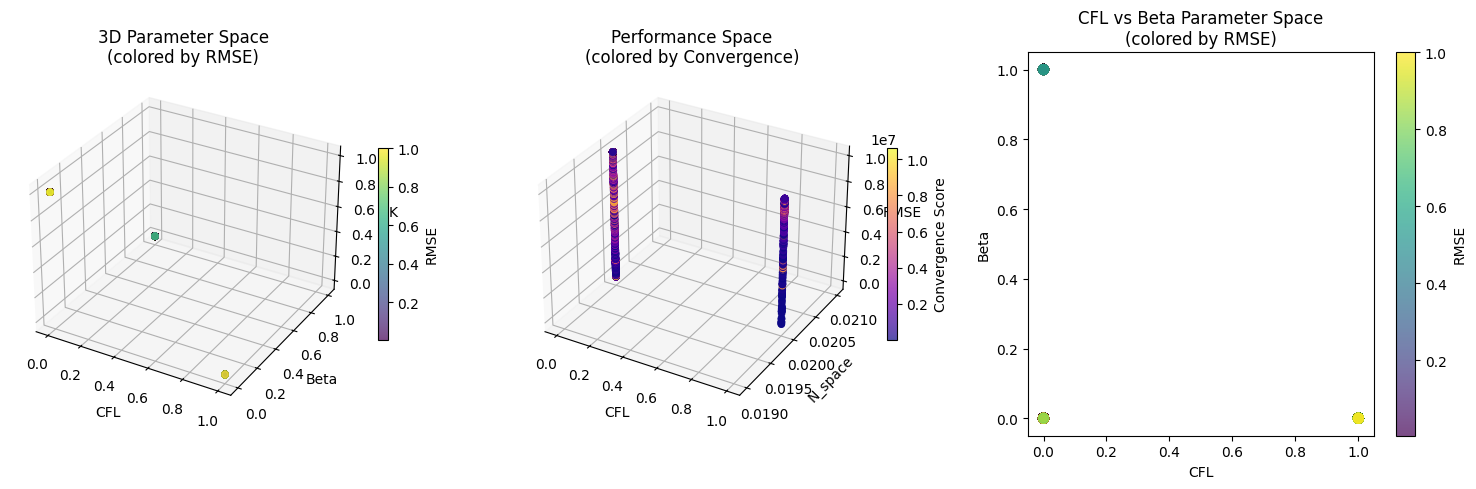

Additional Euler 1D CFL visualizations complete!


In [21]:
def create_euler_parameter_relationships(data, save_dir="./temp"):
    """Create scatter plots showing relationships between Euler 1D parameters and outputs"""
    x_s, x_t, y = process_euler_data(data)
    
    x_s_labels = ['CFL', 'Beta', 'K', 'N_space']
    y_labels = ['RMSE', 'Convergence_Score']
    
    # Create parameter vs output scatter plots
    fig, axes = plt.subplots(2, 4, figsize=(20, 10))
    
    for i, param_label in enumerate(x_s_labels):
        for j, output_label in enumerate(y_labels):
            ax = axes[j, i]
            
            # Create scatter plot
            scatter = ax.scatter(x_s[:, i].numpy(), y[:, j].numpy(), 
                               alpha=0.6, c='blue', s=20)
            
            ax.set_xlabel(f'{param_label}')
            ax.set_ylabel(f'{output_label}')
            ax.set_title(f'{output_label} vs {param_label}')
            ax.grid(True, alpha=0.3)
            
            # Add trend line if correlation is significant
            correlation = np.corrcoef(x_s[:, i].numpy(), y[:, j].numpy())[0,1]
            if abs(correlation) > 0.3:  # Show trend line for moderate correlation
                z = np.polyfit(x_s[:, i].numpy(), y[:, j].numpy(), 1)
                p = np.poly1d(z)
                ax.plot(x_s[:, i].numpy(), p(x_s[:, i].numpy()), "r--", alpha=0.8, linewidth=2)
                ax.text(0.05, 0.95, f'r={correlation:.3f}', 
                       transform=ax.transAxes, verticalalignment='top',
                       bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
    
    plt.suptitle('Euler 1D CFL - Parameter vs Output Relationships', fontsize=16)
    plt.tight_layout()
    plt.savefig(f"{save_dir}/euler_parameter_output_relationships.png", dpi=300, bbox_inches='tight')
    plt.show()

def create_euler_parameter_space_visualization(data, save_dir="./temp"):
    """Create 3D visualization of parameter space with performance coloring"""
    x_s, x_t, y = process_euler_data(data)
    
    # Select most important parameters for 3D plot (CFL, Beta, RMSE)
    fig = plt.figure(figsize=(15, 5))
    
    # 3D scatter plot: CFL vs Beta vs K, colored by RMSE
    ax1 = fig.add_subplot(131, projection='3d')
    scatter1 = ax1.scatter(x_s[:, 0].numpy(), x_s[:, 1].numpy(), x_s[:, 2].numpy(), 
                          c=y[:, 0].numpy(), cmap='viridis', alpha=0.7)
    ax1.set_xlabel('CFL')
    ax1.set_ylabel('Beta')
    ax1.set_zlabel('K')
    ax1.set_title('3D Parameter Space\n(colored by RMSE)')
    plt.colorbar(scatter1, ax=ax1, shrink=0.5, label='RMSE')
    
    # 3D scatter plot: CFL vs N_space vs RMSE, colored by Convergence
    ax2 = fig.add_subplot(132, projection='3d')
    scatter2 = ax2.scatter(x_s[:, 0].numpy(), x_s[:, 3].numpy(), y[:, 0].numpy(), 
                          c=y[:, 1].numpy(), cmap='plasma', alpha=0.7)
    ax2.set_xlabel('CFL')
    ax2.set_ylabel('N_space')
    ax2.set_zlabel('RMSE')
    ax2.set_title('Performance Space\n(colored by Convergence)')
    plt.colorbar(scatter2, ax=ax2, shrink=0.5, label='Convergence Score')
    
    # 2D parameter space with performance contours
    ax3 = fig.add_subplot(133)
    scatter3 = ax3.scatter(x_s[:, 0].numpy(), x_s[:, 1].numpy(), 
                          c=y[:, 0].numpy(), cmap='viridis', alpha=0.7, s=50)
    ax3.set_xlabel('CFL')
    ax3.set_ylabel('Beta')
    ax3.set_title('CFL vs Beta Parameter Space\n(colored by RMSE)')
    plt.colorbar(scatter3, ax=ax3, label='RMSE')
    
    plt.tight_layout()
    plt.savefig(f"{save_dir}/euler_parameter_space_3d.png", dpi=300, bbox_inches='tight')
    plt.show()

# Execute additional Euler visualizations
print("Creating parameter relationship plots...")
create_euler_parameter_relationships(train_data, save_dir="/home/ubuntu/dev/outputs/figs")

print("Creating parameter space visualizations...")  
create_euler_parameter_space_visualization(train_data, save_dir="/home/ubuntu/dev/outputs/figs")

print("Additional Euler 1D CFL visualizations complete!")

Creating comparison step-score plot from three datasets...
Loading data from all three datasets (truncated at step 5)...
Loading CAED Agent data from /home/ubuntu/dev/outputs/optimization-results/heat_surrogate_best_per_step.json...
  CAED Agent: 24 files, 6 steps (0-5)
Loading Base LLM data from /home/ubuntu/dev/outputs/optimization-results/heat_baseline_best_per_step.json...
  Base LLM: 24 files, 6 steps (0-5)
Loading OPRO data from /home/ubuntu/dev/outputs/optimization-results/heat_oracle_best_per_step.json...
  OPRO: 24 files, 6 steps (0-5)
Loading BO data from /home/ubuntu/dev/outputs/optimization-results/heat_bo_best_per_step.json...
  BO: 24 files, 6 steps (0-5)


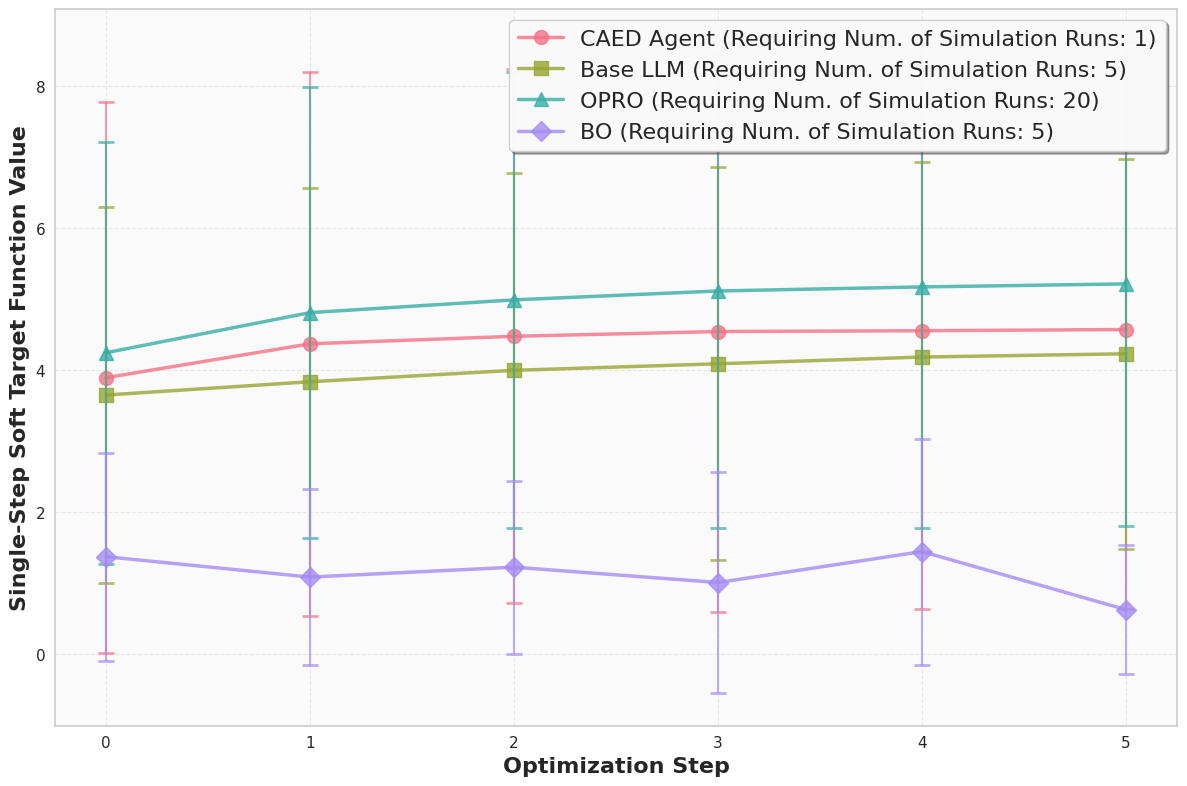

Plot saved as /home/ubuntu/dev/outputs/figs/optimization_comparison_step_scores_max5.pdf

Summary Statistics (Steps 0-5):

CAED Agent:
  Steps: 0 to 5
  Value range: 3.888 to 4.566
  Mean improvement: 0.677
  Final value: 4.566

Base LLM:
  Steps: 0 to 5
  Value range: 3.644 to 4.225
  Mean improvement: 0.581
  Final value: 4.225

OPRO:
  Steps: 0 to 5
  Value range: 4.240 to 5.208
  Mean improvement: 0.969
  Final value: 5.208

BO:
  Steps: 0 to 5
  Value range: 0.624 to 1.441
  Mean improvement: -0.745
  Final value: 0.624


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import json
import os
from collections import defaultdict

def load_extracted_data(file_path):
    """Load extracted best values data from JSON file"""
    try:
        with open(file_path, 'r') as f:
            data = json.load(f)
        return data
    except Exception as e:
        print(f"Failed to load {file_path}: {e}")
        return None

def compute_mean_scores_from_extracted_data(data, max_step=5):
    """Compute mean scores across all runs for each step
    
    Expected format: {file_key: [[step, n_space, score], [step, n_space, score], ...], ...}
    
    Args:
        data: The loaded JSON data
        max_step: Maximum step to include (inclusive). Steps beyond this will be truncated.
    """
    if not data:
        return {}, {}, 0
    
    all_step_scores = defaultdict(list)
    
    # Iterate through all runs/files in the extracted data
    for file_key, step_data in data.items():
        if isinstance(step_data, list):
            # Each entry is [step, n_space, score]
            for entry in step_data:
                if len(entry) >= 3:
                    step = entry[0]
                    score = entry[2]  # The score is the third element
                    
                    try:
                        step_int = int(step)
                        score_float = float(score)
                        
                        # Truncate data beyond max_step
                        if step_int <= max_step:
                            all_step_scores[step_int].append(score_float)
                    except (ValueError, TypeError):
                        continue
    
    # Compute means and standard deviations
    mean_scores = {}
    std_scores = {}
    
    for step in all_step_scores:
        if all_step_scores[step]:  # Check if not empty
            mean_scores[step] = np.mean(all_step_scores[step])
            std_scores[step] = np.std(all_step_scores[step])
    
    num_files = len([k for k, v in data.items() if isinstance(v, list) and len(v) > 0])
    
    return mean_scores, std_scores, num_files

def create_comparison_step_score_plot(max_step=5):
    """Create step-score plot comparing three datasets
    
    Args:
        max_step: Maximum step to include in the plot (inclusive)
    """
    
    # Define the datasets to compare
    datasets = {
        "CAED Agent": "/home/ubuntu/dev/outputs/optimization-results/heat_surrogate_best_per_step.json",
        "Base LLM": "/home/ubuntu/dev/outputs/optimization-results/heat_baseline_best_per_step.json", 
        "OPRO": "/home/ubuntu/dev/outputs/optimization-results/heat_oracle_best_per_step.json",
        "BO": "/home/ubuntu/dev/outputs/optimization-results/heat_bo_best_per_step.json"
    }
    
    sim_run = {
        "CAED Agent": "1",
        "Base LLM": "5",
        "OPRO": "20",
        "BO": "5"
    }
    
    print(f"Loading data from all three datasets (truncated at step {max_step})...")
   
    # Load and process all datasets
    results = {}
    for label, file_path in datasets.items():
        print(f"Loading {label} data from {file_path}...")
        
        if not os.path.exists(file_path):
            print(f"  Warning: File not found: {file_path}")
            continue
            
        data = load_extracted_data(file_path)
        if not data:
            print(f"  Failed to load {label} data")
            continue
        
        # Compute means for this dataset with truncation
        mean_scores, std_scores, num_files = compute_mean_scores_from_extracted_data(data, max_step=max_step)
        
        if not mean_scores:
            print(f"  No valid step data found in {label}")
            continue
        
        results[label] = {
            'mean_scores': mean_scores,
            'std_scores': std_scores,
            'num_files': num_files
        }
        
        print(f"  {label}: {num_files} files, {len(mean_scores)} steps (0-{max_step})")
    
    if not results:
        print("No valid data found in any dataset")
        return None
    
    # Set seaborn style
    sns.set_style("whitegrid")
    plt.rcParams.update({'font.size': 11})
    
    # Create the plot with seaborn styling
    fig, ax = plt.subplots(1, 1, figsize=(12, 8))
    
    # Use seaborn color palette
    colors = sns.color_palette("husl", len(results))
    markers = ['o', 's', '^', 'D', 'v']  # Different markers for each dataset
    
    # Plot each dataset
    for i, (label, data) in enumerate(results.items()):
        mean_scores = data['mean_scores']
        std_scores = data['std_scores']
        num_files = data['num_files']
        
        # Prepare data for plotting
        steps = sorted(mean_scores.keys())
        values = [mean_scores[s] for s in steps]
        errors = [std_scores[s] for s in steps]
        
        color = colors[i]
        marker = markers[i % len(markers)]
        
        # Create the line plot
        line = ax.plot(steps, values, marker=marker, linestyle='-', 
                      color=color, linewidth=2.5, markersize=10,
                      label=f'{label} (Requiring Num. of Simulation Runs: {sim_run[label]})', alpha=0.8)[0]
        
        # Add error bars
        ax.errorbar(steps, values, yerr=errors, fmt='none', 
                   color=color, capsize=6, capthick=2, alpha=0.7, linewidth=1.5)
    
    # Seaborn-style axis formatting
    ax.set_xlabel('Optimization Step', fontsize=16, weight='bold')
    ax.set_ylabel('Single-Step Soft Target Function Value', fontsize=16, weight='bold')
    
    # Style the legend with seaborn aesthetics
    legend = ax.legend(fontsize=16, frameon=True, shadow=True, fancybox=True, loc='best')
    legend.get_frame().set_facecolor('white')
    legend.get_frame().set_alpha(0.95)
    
    # Use seaborn grid styling
    ax.grid(True, alpha=0.4, linestyle='--', linewidth=0.8)
    ax.set_facecolor('#fafafa')
    
    # Add subtle spines styling
    for spine in ax.spines.values():
        spine.set_linewidth(1.2)
        spine.set_color('#cccccc')
    
    # Set integer ticks for steps (0 to max_step)
    ax.set_xticks(list(range(0, max_step + 1)))
    
    plt.tight_layout()
    
    # Save the plot
    output_file = f'/home/ubuntu/dev/outputs/figs/optimization_comparison_step_scores_max{max_step}.pdf'
    plt.savefig(output_file, dpi=300, bbox_inches='tight', format="pdf")
    plt.show()
    
    print(f"Plot saved as {output_file}")
    
    # Print summary statistics for each dataset
    print(f"\nSummary Statistics (Steps 0-{max_step}):")
    for label, data in results.items():
        mean_scores = data['mean_scores']
        steps = sorted(mean_scores.keys())
        values = [mean_scores[s] for s in steps]
        
        print(f"\n{label}:")
        print(f"  Steps: {min(steps)} to {max(steps)}")
        print(f"  Value range: {min(values):.3f} to {max(values):.3f}")
        if len(values) > 1:
            print(f"  Mean improvement: {(values[-1] - values[0]):.3f}")
        print(f"  Final value: {values[-1]:.3f}")
    
    return results

# Execute the plot creation with truncation at step 5
print("Creating comparison step-score plot from three datasets...")
results = create_comparison_step_score_plot(max_step=5)

Creating plot with your specified files...
Loading data from single files (truncated at step 9)...
Loading Surrogate Refined data from /home/ubuntu/dev/outputs/optimization-results/openai_surrogate_refined/1D_heat_transfer-n_space-1-o-o4-mini-2025-09-11-15-32-14.json...
  Found old_value_pairs_with_i_step with keys: ['-1', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
  Surrogate Refined: 11 steps
  Steps found: [-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
  Sample scores: [(-1, '366.8513'), (0, '0.0000'), (1, '0.0000')]
Loading Surrogate Numerical data from /home/ubuntu/dev/outputs/optimization-results/openai_surrogate_numerical/1D_heat_transfer-n_space-1-o-o4-mini-2025-09-11-15-31-08.json...
  Found old_value_pairs_with_i_step with keys: ['-1', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
  Surrogate Numerical: 11 steps
  Steps found: [-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
  Sample scores: [(-1, '366.8513'), (0, '0.0000'), (1, '0.0000')]


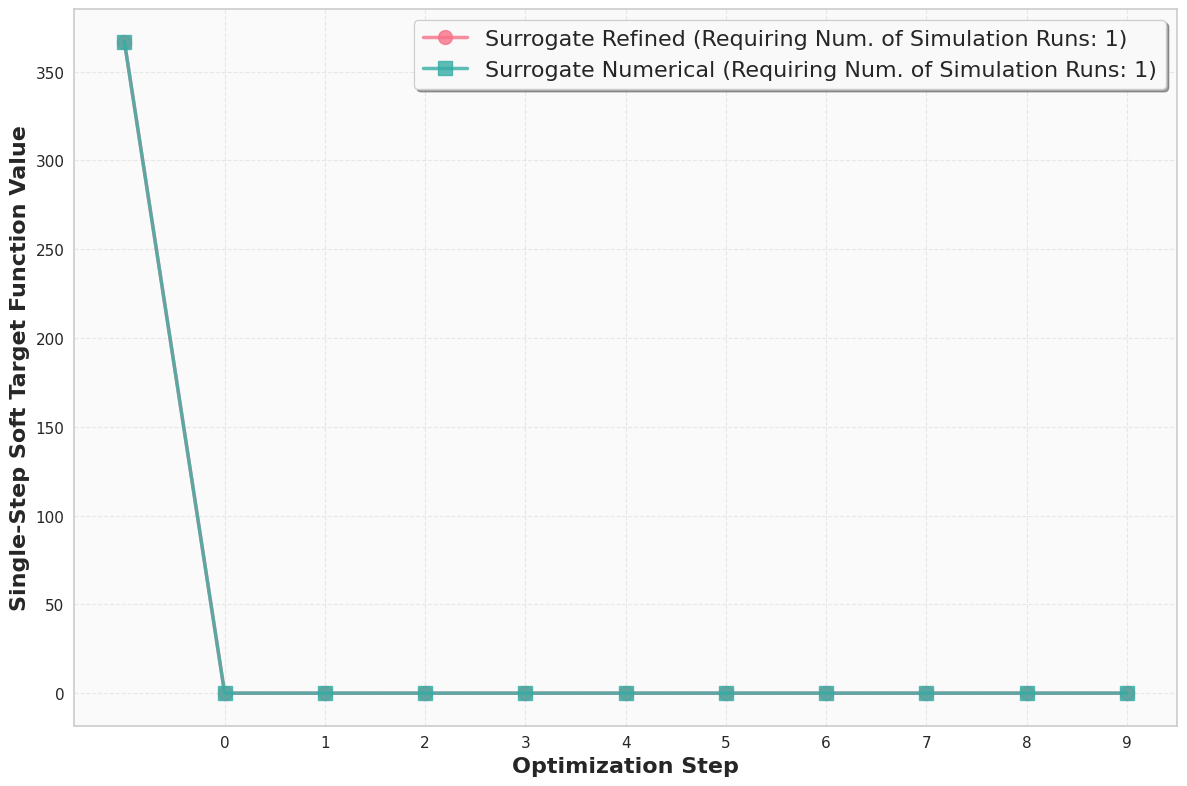

Plot saved as /home/ubuntu/dev/outputs/figs/single_file_optimization_comparison_max9.pdf

Summary Statistics (Steps 0-9):

Surrogate Refined:
  Steps: -1 to 9
  Value range: 0.000 to 366.851
  Improvement: -366.851
  Final value: 0.000

Surrogate Numerical:
  Steps: -1 to 9
  Value range: 0.000 to 366.851
  Improvement: -366.851
  Final value: 0.000
